In [1]:
#####################################################################################################
##### This is a test to use machine learning to achieve similar functions as adaptive smoothing #####
#####                                  It containes various functions                           #####
#####################################################################################################

%matplotlib nbagg
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# First try to generate the pattern we want #

def multivariant_gaussian(height, center_x, center_y, width_x, width_y):
    """Returns a gaussian function with the given parameters"""
    width_x = float(width_x)
    width_y = float(width_y)
    return lambda x,y: height*np.exp(
                -(((center_x-x)/width_x)**2+((center_y-y)/width_y)**2)/2)

<IPython.core.display.Javascript object>


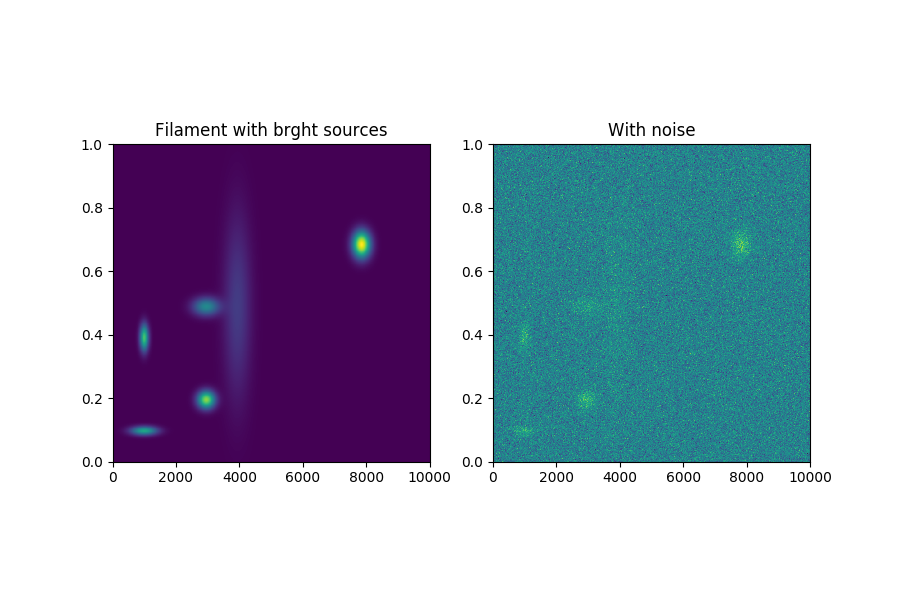

(37.932002430659161, -30.013791884704347)
(17.0, 2.9801507928966027e-95)


In [17]:
################################
#### TEST GENERATING GRAPHS ####
################################

np.random.seed(0)
y, x = np.mgrid[:1024, :1024]

a = [10, 14, 12, 8, 17, 3]
b = [[100, 100], [200, 300], [400, 100], [500, 300], [700, 800], [500, 400]]
c = [[10, 30], [20, 20], [30, 10], [20, 30], [30, 20], [200, 30]]

z = multivariant_gaussian(a[0], b[0][0], b[0][1], c[0][0], c[0][1])(y, x) + \
    multivariant_gaussian(a[1], b[1][0], b[1][1], c[1][0], c[1][1])(y, x) + \
    multivariant_gaussian(a[2], b[2][0], b[2][1], c[2][0], c[2][1])(y, x) + \
    multivariant_gaussian(a[3], b[3][0], b[3][1], c[3][0], c[3][1])(y, x) + \
    multivariant_gaussian(a[4], b[4][0], b[4][1], c[4][0], c[4][1])(y, x) + \
    multivariant_gaussian(a[5], b[5][0], b[5][1], c[5][0], c[5][1])(y, x)
z1 = z + np.random.normal(0., 0.1, z.shape) * 60

plt.figure(figsize=(9, 6))
plt.subplot(1, 2, 1)
plt.imshow(z, origin='lower', interpolation='nearest', extent=[0,1e4,0,1], aspect = 1e4)
plt.title("Filament with brght sources")
plt.subplot(1, 2, 2)
plt.imshow(z1, origin='lower', interpolation='nearest',extent=[0,1e4,0,1], aspect = 1e4)
plt.title("With noise")
print(z1.max(), z1.min())
print(z.max(), z.min())

In [1]:
##########################
#### TEST TENSORBOARD ####
##########################
# import tensorflow as tf
# from tensorboard import summary

# a = tf.constant([2, 2], name = 'a')
# b = tf.constant([2, 6], name = 'b')
# x = tf.add(a, b, name = 'add')
# with tf.Session() as sess: 
#     writer = tf.summary.FileWriter('./graphs', sess.graph)
#     print(sess.run(x))
#     writer.close()

In [ ]:
%%sh 
tensorboard --logdir=log_train

<IPython.core.display.Javascript object>


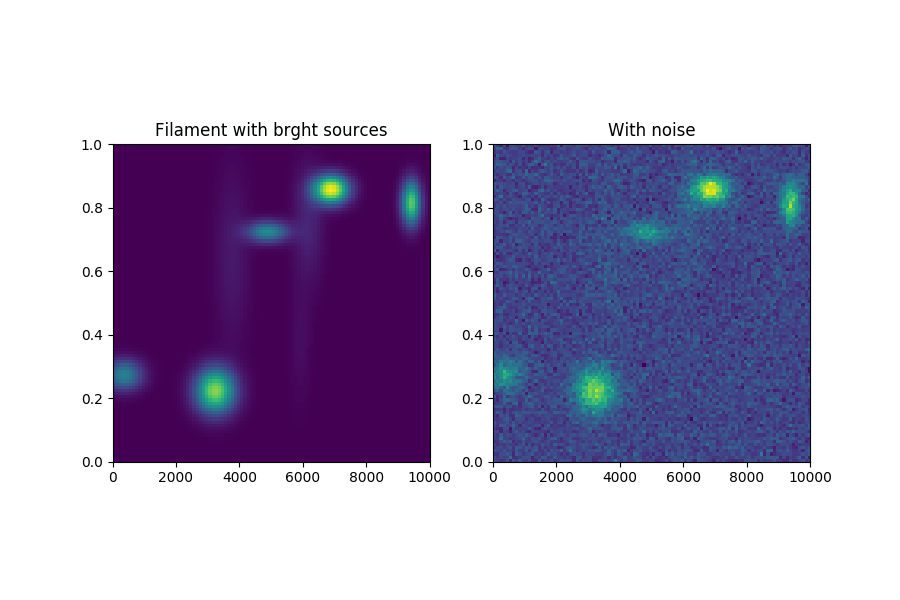

In [3]:
###########################################
#### GENERATE TRAIN AND TEST DATA SETS ####
###########################################

from random import randint 
np.random.seed(0)
y, x = np.mgrid[:100, :100]
    
test_file = open('data/test_batch', 'ab')

for i in range(1200):
    a = np.multiply(0.1, [randint(10, 30), randint(10, 30), randint(10, 30), randint(10, 30), randint(10, 30), randint(1, 5), randint(1, 5), randint(1, 5)])
    b = np.multiply(0.1, [[randint(1, 1000), randint(1, 1000)], [randint(1, 1000), randint(1, 1000)], [randint(1, 1000), randint(1, 1000)], [randint(1, 1000), randint(1, 1000)], [randint(1, 1000), randint(1, 1000)], [randint(300, 800), randint(300, 800)], [randint(300, 800), randint(300, 800)], [randint(300, 800), randint(300, 800)]])
    c = np.multiply(0.1, [[randint(10, 50), randint(10, 50)], [randint(10, 50), randint(10, 50)], [randint(10, 50), randint(10, 50)], [randint(10, 50), randint(10, 50)], [randint(10, 50), randint(10, 50)], [randint(100, 200), randint(10, 50)], [randint(100, 200), randint(10, 50)], [randint(100, 200), randint(10, 50)]])
    
    z = multivariant_gaussian(a[0], b[0][0], b[0][1], c[0][0], c[0][1])(y, x) + \
        multivariant_gaussian(a[1], b[1][0], b[1][1], c[1][0], c[1][1])(y, x) + \
        multivariant_gaussian(a[2], b[2][0], b[2][1], c[2][0], c[2][1])(y, x) + \
        multivariant_gaussian(a[3], b[3][0], b[3][1], c[3][0], c[3][1])(y, x) + \
        multivariant_gaussian(a[4], b[4][0], b[4][1], c[4][0], c[4][1])(y, x) + \
        multivariant_gaussian(a[5], b[5][0], b[5][1], c[5][0], c[5][1])(y, x) + \
        multivariant_gaussian(a[6], b[6][0], b[6][1], c[6][0], c[6][1])(y, x) + \
        multivariant_gaussian(a[7], b[7][0], b[7][1], c[7][0], c[7][1])(y, x)
    if i < 1000:
        data_file = open(r'data/data_batch_%d'% (i % 10), 'ab')
        z1 = z + np.random.normal(0., 0.1, z.shape) * np.random.uniform(1,4)
        z.tofile(data_file)
        z1.tofile(data_file)
        data_file.close()
    else:   
        z1 = z + np.random.normal(0., 0.1, z.shape) * np.random.uniform(1,4)
        z.tofile(test_file)
        z1.tofile(test_file)
        
test_file.close()
plt.figure(figsize=(9, 6))
plt.subplot(1, 2, 1)
plt.imshow(z, origin='lower', interpolation='nearest', extent=[0,1e4,0,1], aspect = 1e4)
plt.title("Filament with brght sources")
plt.subplot(1, 2, 2)
plt.imshow(z1, origin='lower', interpolation='nearest',extent=[0,1e4,0,1], aspect = 1e4)
plt.title("With noise")

In [3]:
# import os
# z = np.loadtxt('data/train_4')
# record = z.nbytes
# print(record)
# print(z.shape)

# output_file = open('test', 'wb')
# label = np.array(1)
# label.tofile(output_file)
# z.tofile(output_file)
# output_file.close()
# os.path.getsize('test')

IOError: [Errno 2] No such file or directory: 'data/train_4'

In [28]:
#########################
#### CHECK FILE SIZE ####
#########################

import os
print(os.path.getsize('data/data_batch_0'))
print(10 * 100 * 100 * 8 * 2)
print(os.path.getsize('data/test_batch'))
print(20 * 100 * 100 * 8 * 2)

1600000
1600000
3200000
3200000


<IPython.core.display.Javascript object>


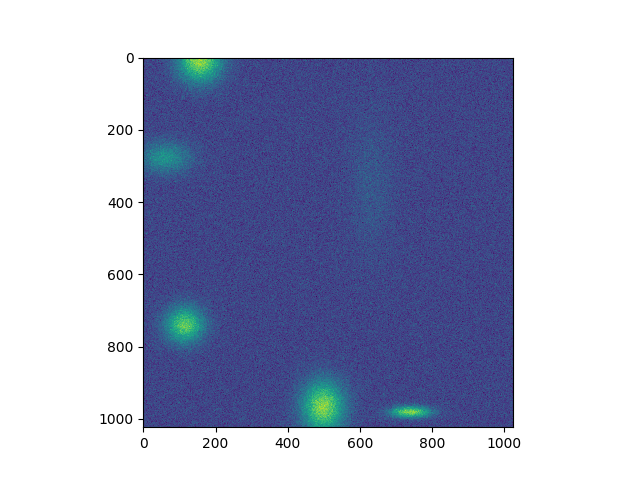

<IPython.core.display.Javascript object>


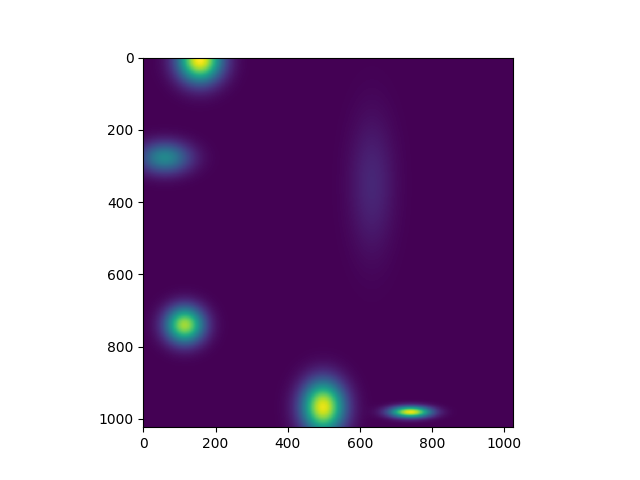

In [23]:
################
#### HOORAY ####
################

import fits_input
import tensorflow as tf
from PIL import Image
import numpy as np

filenames = ['data/test_batch']
filename_queue = tf.train.string_input_producer(filenames)
for f in filenames:
    if not tf.gfile.Exists(f):
        raise ValueError('Failed to find file: ' + f)
read_input = fits_input.read_fits(filename_queue)
init_op = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init_op)
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)

    for i in range(5): #length of your filename list
        if i == 2:
            image = read_input.fp64image.eval() #here is your image Tensor :) 
            plt.figure()
            plt.imshow(image[:, :, 0])
            image_clean = read_input.fp64image_clean.eval() #here is your image Tensor :) 
            plt.figure()
            plt.imshow(image_clean[:, :, 0])
    coord.request_stop()
    coord.join(threads)

In [142]:
packet = '\x83\x32\x03' 

In [143]:
xor = 0
i = 0
while i < len(packet):
    xor = xor ^ ord(packet[i])
    i += 1

In [146]:
print(xor)

178


In [145]:
print str(hex(xor)[2]) + str(hex(xor)[3])

b2


In [148]:
'\x30'

'0'

In [88]:
'8'.encode('hex')

'38'

In [90]:
import struct

In [120]:
hex(xor)[2]

'8'

In [126]:
struct.pack('x', '8')

error: pack expected 0 items for packing (got 1)

In [136]:
'\x38\x37'

'87'

In [140]:
str(hex(xor)[2]) + str(hex(xor)[3])

'87'

In [151]:
a = '\x30\x30\x30\x30\x32\x30'

In [152]:
print(a)

000020


In [153]:
b = '\x31\x2e\x35\x45\x2b\x30\x30\x20\x20\x20'

In [163]:
print(float('2.8E-01'))

0.28


<IPython.core.display.Javascript object>


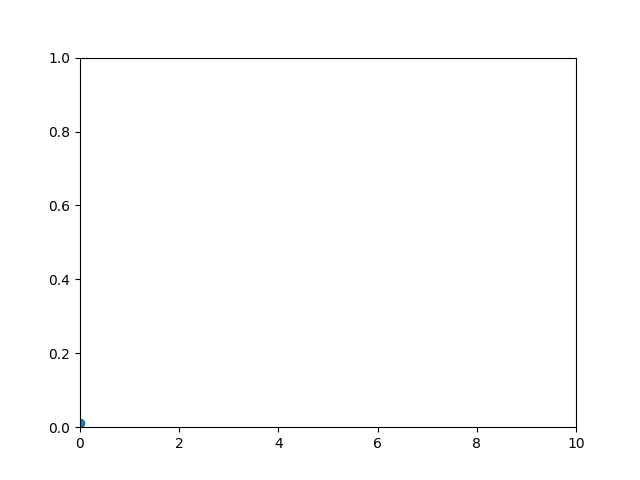

NotImplementedError: 

In [161]:
import numpy as np
import matplotlib.pyplot as plt

plt.axis([0, 10, 0, 1])

for i in range(10):
    y = np.random.random()
    plt.scatter(i, y)
    plt.pause(1)

plt.show()

In [ ]:
float